In [1]:
import pandas as pd
import numpy as np 
import warnings
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import plotly.graph_objects as go
import plotly.express as px


warnings.filterwarnings('ignore')

# imported the file which contains top 25 headlines, stock went up or down(label) and date
data1 = pd.read_csv(r"C:\Users\manis\OneDrive\Documents\Python\Data.csv", encoding = "ISO-8859-1")
# data1 = pd.read_csv(r"c:\Users\manis\OneDrive\Documents\Python\Daily News for Stock Market Prediction\Combined_News_DJIA.csv")
data1.head()

# CombNews=pd.read_csv(r"c:\Users\manis\OneDrive\Documents\Python\Daily News for Stock Market Prediction\Combined_News_DJIA.csv")
# RedditNews=pd.read_csv(r"c:\Users\manis\OneDrive\Documents\Python\Daily News for Stock Market Prediction\RedditNews.csv")
# DJIA=pd.read_csv(r"c:\Users\manis\OneDrive\Documents\Python\Daily News for Stock Market Prediction\upload_DJIA_table.csv")

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft


In [2]:
data1.isnull().sum().tail()

Top21    0
Top22    0
Top23    1
Top24    3
Top25    3
dtype: int64

In [3]:
# # filling the null values with median 

# data1['Top23'].fillna(data1['Top23'].median,inplace=True)
# data1['Top24'].fillna(data1['Top24'].median,inplace=True)
# data1['Top25'].fillna(data1['Top25'].median,inplace=True)

In [4]:
data1.dropna(inplace=True)
data1.shape

(4098, 27)

In [5]:
# seperating the data into train and test
# x=data1
# y=data1['Label']
# x_train,x_test,y_train,y_test=train_test_split(data1,y,test_size=0.2,random_state=123)

train = data1[data1['Date'] < '20150101']
test = data1[data1['Date'] > '20141231']

In [6]:
# removing punctuations and changing all the letters to lowercase for both train and test

all_data = [train,test]

for df in all_data:
    df.replace("[^a-zA-Z]"," ",regex=True, inplace=True)
    for i in df.columns:
        if i=='Date':
            continue
        if i=='Label':
            continue
        df[i] = df[i].str.lower()

test.shape

(378, 27)

In [7]:
# combining all the headlines in train data into one and appending them into a list 

headlines = []
for row in range(0,len(train.index)):
    headlines.append(' '.join(str(x) for x in train.iloc[row,2:]))
headlines[0]

'a  hindrance to operations   extracts from the leaked reports scorecard hughes  instant hit buoys blues jack gets his skates on at ice cold alex chaos as maracana builds up for united depleted leicester prevail as elliott spoils everton s party hungry spurs sense rich pickings gunners so wide of an easy target derby raise a glass to strupar s debut double southgate strikes  leeds pay the penalty hammers hand robson a youthful lesson saints party like it s      wear wolves have turned into lambs stump mike catches testy gough s taunt langer escapes to hit     flintoff injury piles on woe for england hunters threaten jospin with new battle of the somme kohl s successor drawn into scandal the difference between men and women sara denver  nurse turned solicitor diana s landmine crusade put tories in a panic yeltsin s resignation caught opposition flat footed russian roulette sold out recovering a title'

In [8]:
train.tail()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
3970,,0,brazil declares emergency after babies a...,scientists find big yr old viking settlem...,paris attacks belgian police arrest ninth sus...,wiretapping reveals communication between turk...,russia airstrikes hundreds of syrian civilans...,pakistan changes neutral position on syrian ci...,north korean diplomat arrested in south africa...,german teachers want mein kampf on syllabus,...,report on sexual exploitation and abuse by pea...,baby girl dies after x president s son s staff...,china smog sparks red alerts in cities,us planned east berlin s systematic destructi...,qatar world cup workers earning as littl...,thai court sentences two to death for killings...,germany pays to halt danish wind power to prot...,egypts president sisi urges islamic scholars t...,russia rejects amnesty internationals report o...,cameron osborne and murdoch back together at ...
3971,,0,germany recruits teachers to teach germa...,almost people have signed an italian po...,japan apologizes to korea over sexual enslavem...,milan and rome ban cars as pollution rises mi...,saudi posts record bn deficit in,the united states russia iran and saudi ara...,vladimir putin has achieved his central goal o...,noted syrian journalist who uncovered isis ale...,...,saudi arabia plans subsidy cuts as king unveil...,syria anti isis documentary maker assassinate...,denmark wants geneva convention debate if euro...,david cameron is heckled during visit to flood...,british army is deployed as flooding submerges...,brazils reluctance to accept an israeli ambass...,russian gdp down percent year on year in n...,syria and iraq ethnic cleansing by sunni and ...,deadly car bomb explodes at kabul airport,experiment in germany tests the idea of an em...
3972,,1,pentagon thwarts obama s effort to close guant...,rare footage of giant squid in japan,muslims tell isis they d rather see star wars ...,syrian journalist who documented isis atrociti...,north korea s second most powerful man sent to...,austria turns away hundreds of migrants for ly...,saudi grand mufti calls isis part of the israe...,what has war yielded neither land nor heaven...,...,iran hands over stockpile of enriched uranium ...,registrar shuts down all pirate bay domain names,the irish government has taken unprecedented a...,saudi arabia to raise domestic petrol prices b...,saudi arabia hikes petrol prices by at the...,world health organization declares guinea ebol...,hacker group anonymous is helping the making ...,russia has removed uranium from iran,china threatens to shoot down australian aircr...,israel warns brazil to accept its settler amba...
3973,,0,tech companies face criminal charges if they n...,mexican marijuana farmers see profits tumble a...,a would be suicide bomber and his wife have be...,the rich will get richer while two million mor...,the north pole will have above freezing temper...,south australia new sexting laws to spare ch...,isis militants burn media activists to deat...,italy fines apple over misleading tax conduct,...,norway to turn back asylum seekers on swedish ...,islamic state suffers double blow as ramadi fa...,journalist reveals erdoan imprisoned him for e...,russian moon base plan falls victim to budget ...,belgium netherlands to exchange territory wi...,north korea says top official kim yang gon kil...,putin s son in law boosted by bln russia...,an orgasm a day could cut prostate cancer risk,germans claim belgian nuclear reactors are fa...,uk sperm bank doesn t accept donors with dysle...
3974,,0,microsoft corp said on wednesday it will begin...,greek orthodox church homosexuals are god s c...,vladmir putin officially dissolves roscosmos ...,donald trump could be refused entry to the uk ...,saudi arabia says its ready to meet any additi...,new year fireworks and festivities have been c...,new species of human may have shared our caves...,egypt becomes second n

In [9]:
# combining all the headlines in test data into one and appending them into a list 

test_transform= []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
    
print(test_transform)

['most cases of cancer are the result of sheer bad luck rather than unhealthy lifestyles  diet or even inherited genes  new research suggests  random mutations that occur in dna when cells divide are responsible for two thirds of adult cancers across a wide range of tissues  iran dismissed united states efforts to fight islamic state as a ploy to advance u s  policies in the region   the reality is that the united states is not acting to eliminate daesh  they are not even interested in weakening daesh  they are only interested in managing it  poll  one in   germans would join anti muslim marches uk royal family s prince andrew named in us lawsuit over underage sex allegations some    asylum seekers refused to leave the bus when they arrived at their destination in rural northern sweden  demanding that they be taken back to malm or  some big city   pakistani boat blows self up after india navy chase  all four people on board the vessel from near the pakistani port city of karachi are be

In [10]:
# Applying countvectorizer on headlines list that we created before and max features is set to 100009

countvector=CountVectorizer(ngram_range=(2,2),max_features=100000)
traindataset=countvector.fit_transform(headlines)

randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(traindataset,train['Label'])
print(traindataset)
# train['Label']

  (0, 27500)	1
  (0, 32949)	1
  (0, 84842)	1
  (0, 34392)	1
  (0, 76638)	1
  (0, 61007)	1
  (0, 40007)	1
  (0, 15755)	1
  (0, 12787)	1
  (0, 92241)	1
  (0, 31625)	1
  (0, 7350)	1
  (0, 71759)	1
  (0, 58675)	1
  (0, 2930)	1
  (0, 25299)	1
  (0, 34752)	1
  (0, 22029)	1
  (0, 64747)	1
  (0, 85373)	1
  (0, 64413)	1
  (0, 50305)	1
  (0, 98650)	1
  (0, 37309)	1
  (0, 91344)	1
  :	:
  (3971, 39276)	1
  (3971, 2007)	1
  (3971, 74310)	1
  (3971, 53060)	1
  (3971, 40198)	1
  (3971, 58690)	1
  (3971, 35398)	1
  (3971, 46683)	1
  (3971, 5757)	1
  (3971, 34775)	1
  (3971, 6939)	1
  (3971, 19319)	1
  (3971, 80782)	1
  (3971, 72874)	1
  (3971, 52776)	1
  (3971, 15225)	1
  (3971, 47356)	1
  (3971, 16370)	1
  (3971, 9549)	1
  (3971, 42988)	1
  (3971, 22484)	1
  (3971, 24127)	1
  (3971, 29287)	1
  (3971, 45464)	1
  (3971, 22491)	2


In [11]:
# Applying countvectorizer on test_transform list that we created before 

test_dataset = countvector.transform(test_transform)
predictions = randomclassifier.predict(test_dataset)
print(predictions)

# accuracy score (compared test daset original output values with predictions)
score=accuracy_score(test['Label'],predictions)
print('RandomForestClassifier: ',score)
print('===============================')
matrix=confusion_matrix(test['Label'],predictions)
print('confusion matrix : ')
print(format(matrix))

def my_dict(name,score):
    my_matrix = {}
    my_matrix['Algorithm Name'] = name
    my_matrix['Score'] = str(round((score*100),2 ))+'%'
    return my_matrix
    
import pandas as pd
resultsdf = pd.DataFrame({'A' : []})
resultsdf = resultsdf.from_dict(my_dict('RandomForestClassifier',score),orient = 'index')
resultsdf=resultsdf.transpose()
resultsdf



[1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1
 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 0 0 1
 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1
 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1
 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 1
 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1
 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0
 0 1 0 1 1 1 1 1]
RandomForestClassifier:  0.8544973544973545
confusion matrix : 
[[146  40]
 [ 15 177]]


,Algorithm Name,Score
0,RandomForestClassifier,85.45%


In [12]:
asd=predictions.reshape(predictions.shape[0],-1)
asd

array([[1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
    

In [13]:
# print(test_dataset)
print('Vocabulary: ')
print(countvector.vocabulary_)

Vocabulary: 
{'extracts from': 27500, 'from the': 32949, 'the leaked': 84842, 'gets his': 34392, 'skates on': 76638, 'on at': 61007, 'ice cold': 40007, 'chaos as': 15755, 'builds up': 12787, 'up for': 92241, 'for united': 31625, 'as elliott': 7350, 'rich pickings': 71759, 'of an': 58675, 'an easy': 2930, 'easy target': 25299, 'glass to': 34752, 'debut double': 22029, 'pay the': 64747, 'the penalty': 85373, 'party like': 64413, 'like it': 50305, 'wolves have': 98650, 'have turned': 37309, 'turned into': 91344, 'escapes to': 26784, 'to hit': 89330, 'piles on': 65603, 'woe for': 98632, 'for england': 30664, 'with new': 98199, 'new battle': 56133, 'battle of': 10261, 'of the': 60194, 'drawn into': 24490, 'into scandal': 43784, 'scandal the': 74027, 'the difference': 83949, 'difference between': 23276, 'between men': 11357, 'men and': 53199, 'and women': 5322, 'in panic': 41737, 'russian roulette': 73186, 'sold out': 77226, 'the best': 83376, 'leader german': 48972, 'the main': 84954, 'has 

In [14]:
print(test_dataset)

  (0, 213)	1
  (0, 388)	1
  (0, 824)	1
  (0, 1921)	1
  (0, 4706)	1
  (0, 5115)	1
  (0, 5519)	1
  (0, 5705)	1
  (0, 6149)	1
  (0, 6247)	1
  (0, 6483)	1
  (0, 6497)	1
  (0, 6551)	1
  (0, 6622)	1
  (0, 7053)	1
  (0, 7123)	1
  (0, 8202)	1
  (0, 8637)	1
  (0, 8638)	1
  (0, 8816)	1
  (0, 9298)	1
  (0, 9535)	1
  (0, 9619)	1
  (0, 10815)	1
  (0, 11007)	1
  :	:
  (377, 89441)	2
  (377, 90066)	1
  (377, 90103)	1
  (377, 90423)	1
  (377, 92012)	1
  (377, 92584)	1
  (377, 92778)	1
  (377, 93140)	1
  (377, 93819)	1
  (377, 93881)	1
  (377, 94414)	1
  (377, 95330)	1
  (377, 95681)	1
  (377, 97389)	1
  (377, 97826)	1
  (377, 98127)	1
  (377, 98413)	1
  (377, 98416)	1
  (377, 98693)	1
  (377, 99139)	1
  (377, 99189)	1
  (377, 99311)	1
  (377, 99509)	3
  (377, 99569)	1
  (377, 99803)	1


In [15]:
print('One swoop:')
new_text = ['Today is the day that I do the thing today, today']
new_vectorizer = CountVectorizer()
print(new_vectorizer.fit_transform(new_text).toarray())

One swoop:
[[1 1 1 1 2 1 3]]


In [16]:
new_vectorizer.vocabulary_

{'today': 6, 'is': 2, 'the': 4, 'day': 0, 'that': 3, 'do': 1, 'thing': 5}

In [17]:
# max_features_num = [500,600,700,800,900,1000]
# ngram = [1,2,3,4,5]

max_features_num = [500,800]
ngram = [1,2]

# setup parameters for xgboost
# param = {}
# param['booster'] = 'gbtree'
# param['objective'] = 'binary:logistic'
# param["eval_metric"] = "error"
# param['eta'] = 0.3
# param['gamma'] = 0
# param['max_depth'] = 6
# param['min_child_weight']=1
# param['max_delta_step'] = 0
# param['subsample']= 1
# param['colsample_bytree']=1
# param['silent'] = 1
# param['seed'] = 0
# param['base_score'] = 0.5


for i in max_features_num:
    for j in ngram:
        countvector=CountVectorizer(ngram_range=(j,j),max_features=i)
        traindataset=countvector.fit_transform(headlines)
        test_dataset = countvector.transform(test_transform)
        

        xgb = XGBClassifier(random_state =1,eval_metric = "error")
#         xgb = XGBClassifier(param)
        xgb.fit(pd.DataFrame(traindataset.todense(), columns=countvector.get_feature_names()),train['Label'])
        predictions = xgb.predict(pd.DataFrame(test_dataset.todense(), columns=countvector.get_feature_names()))
        score=accuracy_score(test['Label'],predictions)
        print('XGBClassifier')
        print('max number of features used : {}'.format(i))
        print('ngram_range ({},{})'.format(j,j))
        print(score)
        matrix=confusion_matrix(test['Label'],predictions)
        print('confusion matrix : {}'.format(matrix))
        print('===============================')

XGBClassifier
max number of features used : 500
ngram_range (1,1)
0.8227513227513228
confusion matrix : [[146  40]
 [ 27 165]]
XGBClassifier
max number of features used : 500
ngram_range (2,2)
0.8227513227513228
confusion matrix : [[150  36]
 [ 31 161]]
XGBClassifier
max number of features used : 800
ngram_range (1,1)
0.8518518518518519
confusion matrix : [[159  27]
 [ 29 163]]
XGBClassifier
max number of features used : 800
ngram_range (2,2)
0.8412698412698413
confusion matrix : [[153  33]
 [ 27 165]]


In [18]:
resultsdf = resultsdf.append(my_dict('XGBClassifier',score),ignore_index = True)
resultsdf

,Algorithm Name,Score
0,RandomForestClassifier,85.45%
1,XGBClassifier,84.13%


In [19]:
cb=CatBoostClassifier(random_state=1)
cb.fit(pd.DataFrame(traindataset.todense(), columns=countvector.get_feature_names()),train['Label'])
predictions = xgb.predict(pd.DataFrame(test_dataset.todense(), columns=countvector.get_feature_names()))
matrix=confusion_matrix(test['Label'],predictions)
score=accuracy_score(test['Label'],predictions)
print('CatBoostClassifier')
print(score)
print('===============')
print(matrix)

Learning rate set to 0.018566
0:	learn: 0.6928571	total: 182ms	remaining: 3m 2s
1:	learn: 0.6926110	total: 209ms	remaining: 1m 44s
2:	learn: 0.6923723	total: 231ms	remaining: 1m 16s
3:	learn: 0.6922393	total: 246ms	remaining: 1m 1s
4:	learn: 0.6920588	total: 261ms	remaining: 52s
5:	learn: 0.6917256	total: 277ms	remaining: 45.9s
6:	learn: 0.6914753	total: 293ms	remaining: 41.6s
7:	learn: 0.6912786	total: 309ms	remaining: 38.3s
8:	learn: 0.6911290	total: 325ms	remaining: 35.8s
9:	learn: 0.6909915	total: 340ms	remaining: 33.7s
10:	learn: 0.6908475	total: 356ms	remaining: 32s
11:	learn: 0.6906002	total: 372ms	remaining: 30.6s
12:	learn: 0.6904104	total: 387ms	remaining: 29.4s
13:	learn: 0.6902263	total: 406ms	remaining: 28.6s
14:	learn: 0.6900655	total: 436ms	remaining: 28.6s
15:	learn: 0.6898337	total: 452ms	remaining: 27.8s
16:	learn: 0.6897084	total: 467ms	remaining: 27s
17:	learn: 0.6894152	total: 483ms	remaining: 26.3s
18:	learn: 0.6892292	total: 498ms	remaining: 25.7s
19:	learn: 0.68

170:	learn: 0.6666104	total: 3.19s	remaining: 15.5s
171:	learn: 0.6665019	total: 3.21s	remaining: 15.5s
172:	learn: 0.6664200	total: 3.23s	remaining: 15.4s
173:	learn: 0.6663236	total: 3.24s	remaining: 15.4s
174:	learn: 0.6662329	total: 3.26s	remaining: 15.4s
175:	learn: 0.6660566	total: 3.27s	remaining: 15.3s
176:	learn: 0.6660004	total: 3.29s	remaining: 15.3s
177:	learn: 0.6658049	total: 3.31s	remaining: 15.3s
178:	learn: 0.6656327	total: 3.32s	remaining: 15.2s
179:	learn: 0.6654823	total: 3.34s	remaining: 15.2s
180:	learn: 0.6652995	total: 3.35s	remaining: 15.2s
181:	learn: 0.6651498	total: 3.37s	remaining: 15.1s
182:	learn: 0.6649953	total: 3.39s	remaining: 15.1s
183:	learn: 0.6648945	total: 3.4s	remaining: 15.1s
184:	learn: 0.6647624	total: 3.42s	remaining: 15.1s
185:	learn: 0.6646974	total: 3.44s	remaining: 15s
186:	learn: 0.6645750	total: 3.45s	remaining: 15s
187:	learn: 0.6644340	total: 3.47s	remaining: 15s
188:	learn: 0.6643574	total: 3.48s	remaining: 14.9s
189:	learn: 0.66418

331:	learn: 0.6465437	total: 5.87s	remaining: 11.8s
332:	learn: 0.6464132	total: 5.89s	remaining: 11.8s
333:	learn: 0.6462353	total: 5.9s	remaining: 11.8s
334:	learn: 0.6461392	total: 5.92s	remaining: 11.7s
335:	learn: 0.6459744	total: 5.93s	remaining: 11.7s
336:	learn: 0.6457754	total: 5.95s	remaining: 11.7s
337:	learn: 0.6456694	total: 5.96s	remaining: 11.7s
338:	learn: 0.6454819	total: 5.98s	remaining: 11.7s
339:	learn: 0.6454098	total: 6s	remaining: 11.6s
340:	learn: 0.6453065	total: 6.01s	remaining: 11.6s
341:	learn: 0.6451800	total: 6.03s	remaining: 11.6s
342:	learn: 0.6450636	total: 6.05s	remaining: 11.6s
343:	learn: 0.6449429	total: 6.07s	remaining: 11.6s
344:	learn: 0.6448535	total: 6.08s	remaining: 11.6s
345:	learn: 0.6447796	total: 6.1s	remaining: 11.5s
346:	learn: 0.6446433	total: 6.12s	remaining: 11.5s
347:	learn: 0.6445777	total: 6.13s	remaining: 11.5s
348:	learn: 0.6444923	total: 6.15s	remaining: 11.5s
349:	learn: 0.6443711	total: 6.16s	remaining: 11.4s
350:	learn: 0.644

490:	learn: 0.6237817	total: 8.58s	remaining: 8.9s
491:	learn: 0.6236014	total: 8.6s	remaining: 8.88s
492:	learn: 0.6234045	total: 8.62s	remaining: 8.86s
493:	learn: 0.6232397	total: 8.63s	remaining: 8.84s
494:	learn: 0.6230992	total: 8.65s	remaining: 8.82s
495:	learn: 0.6229804	total: 8.66s	remaining: 8.8s
496:	learn: 0.6227159	total: 8.68s	remaining: 8.79s
497:	learn: 0.6225491	total: 8.7s	remaining: 8.77s
498:	learn: 0.6223603	total: 8.71s	remaining: 8.75s
499:	learn: 0.6221082	total: 8.73s	remaining: 8.73s
500:	learn: 0.6219288	total: 8.74s	remaining: 8.71s
501:	learn: 0.6217739	total: 8.77s	remaining: 8.7s
502:	learn: 0.6215767	total: 8.78s	remaining: 8.68s
503:	learn: 0.6214822	total: 8.8s	remaining: 8.66s
504:	learn: 0.6212943	total: 8.81s	remaining: 8.64s
505:	learn: 0.6210883	total: 8.83s	remaining: 8.62s
506:	learn: 0.6209611	total: 8.85s	remaining: 8.6s
507:	learn: 0.6207342	total: 8.86s	remaining: 8.58s
508:	learn: 0.6206102	total: 8.88s	remaining: 8.56s
509:	learn: 0.62041

653:	learn: 0.5930155	total: 11.4s	remaining: 6.01s
654:	learn: 0.5929180	total: 11.4s	remaining: 6s
655:	learn: 0.5926635	total: 11.4s	remaining: 5.98s
656:	learn: 0.5924297	total: 11.4s	remaining: 5.97s
657:	learn: 0.5922753	total: 11.5s	remaining: 5.96s
658:	learn: 0.5920164	total: 11.5s	remaining: 5.95s
659:	learn: 0.5917618	total: 11.5s	remaining: 5.93s
660:	learn: 0.5915725	total: 11.5s	remaining: 5.91s
661:	learn: 0.5914327	total: 11.5s	remaining: 5.89s
662:	learn: 0.5912252	total: 11.6s	remaining: 5.88s
663:	learn: 0.5910667	total: 11.6s	remaining: 5.86s
664:	learn: 0.5908577	total: 11.6s	remaining: 5.84s
665:	learn: 0.5906472	total: 11.6s	remaining: 5.82s
666:	learn: 0.5904916	total: 11.6s	remaining: 5.8s
667:	learn: 0.5903354	total: 11.6s	remaining: 5.79s
668:	learn: 0.5901366	total: 11.7s	remaining: 5.77s
669:	learn: 0.5898737	total: 11.7s	remaining: 5.75s
670:	learn: 0.5896806	total: 11.7s	remaining: 5.73s
671:	learn: 0.5895164	total: 11.7s	remaining: 5.71s
672:	learn: 0.58

818:	learn: 0.5642881	total: 14.3s	remaining: 3.16s
819:	learn: 0.5641884	total: 14.3s	remaining: 3.15s
820:	learn: 0.5640153	total: 14.3s	remaining: 3.13s
821:	learn: 0.5638633	total: 14.4s	remaining: 3.11s
822:	learn: 0.5636736	total: 14.4s	remaining: 3.09s
823:	learn: 0.5634838	total: 14.4s	remaining: 3.08s
824:	learn: 0.5633251	total: 14.4s	remaining: 3.06s
825:	learn: 0.5631662	total: 14.4s	remaining: 3.04s
826:	learn: 0.5629980	total: 14.4s	remaining: 3.02s
827:	learn: 0.5628065	total: 14.5s	remaining: 3s
828:	learn: 0.5625711	total: 14.5s	remaining: 2.99s
829:	learn: 0.5624383	total: 14.5s	remaining: 2.97s
830:	learn: 0.5622347	total: 14.5s	remaining: 2.95s
831:	learn: 0.5620699	total: 14.5s	remaining: 2.94s
832:	learn: 0.5619075	total: 14.6s	remaining: 2.92s
833:	learn: 0.5616934	total: 14.6s	remaining: 2.9s
834:	learn: 0.5615190	total: 14.6s	remaining: 2.88s
835:	learn: 0.5613140	total: 14.6s	remaining: 2.86s
836:	learn: 0.5611130	total: 14.6s	remaining: 2.85s
837:	learn: 0.56

984:	learn: 0.5404997	total: 17.2s	remaining: 261ms
985:	learn: 0.5403584	total: 17.2s	remaining: 244ms
986:	learn: 0.5402250	total: 17.2s	remaining: 227ms
987:	learn: 0.5400813	total: 17.2s	remaining: 209ms
988:	learn: 0.5398858	total: 17.2s	remaining: 192ms
989:	learn: 0.5397590	total: 17.3s	remaining: 174ms
990:	learn: 0.5395938	total: 17.3s	remaining: 157ms
991:	learn: 0.5394734	total: 17.3s	remaining: 140ms
992:	learn: 0.5393605	total: 17.3s	remaining: 122ms
993:	learn: 0.5392527	total: 17.3s	remaining: 105ms
994:	learn: 0.5391822	total: 17.4s	remaining: 87.2ms
995:	learn: 0.5390181	total: 17.4s	remaining: 69.8ms
996:	learn: 0.5388449	total: 17.4s	remaining: 52.3ms
997:	learn: 0.5386955	total: 17.4s	remaining: 34.9ms
998:	learn: 0.5385420	total: 17.4s	remaining: 17.4ms
999:	learn: 0.5383662	total: 17.4s	remaining: 0us
CatBoostClassifier
0.8412698412698413
[[153  33]
 [ 27 165]]


In [20]:
resultsdf = resultsdf.append(my_dict('CatBoostClassifier',score),ignore_index = True)
resultsdf

,Algorithm Name,Score
0,RandomForestClassifier,85.45%
1,XGBClassifier,84.13%
2,CatBoostClassifier,84.13%


In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns

#Fit x_train and y-train into the regression model
#fitting the decision tree regression model to the dataset without splitting the dataset
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(traindataset,train['Label'])

y_pred = regressor.predict(test_dataset)
matrix=confusion_matrix(test['Label'],y_pred)
score=accuracy_score(test['Label'],y_pred)
print('DecisionTreeRegressor')
print(score)
print('===============')
print(matrix)


DecisionTreeRegressor
0.8306878306878307
[[157  29]
 [ 35 157]]


In [22]:
resultsdf = resultsdf.append(my_dict('DecisionTreeRegressor',score),ignore_index = True)
resultsdf

,Algorithm Name,Score
0,RandomForestClassifier,85.45%
1,XGBClassifier,84.13%
2,CatBoostClassifier,84.13%
3,DecisionTreeRegressor,83.07%


In [23]:
from sklearn.linear_model import LogisticRegression
model_L=LogisticRegression()
model_L.fit(traindataset,train['Label'])


LogisticRegression()

In [24]:
y_pred = model_L.predict(test_dataset)

In [25]:
# matrix=confusion_matrix(test['Label'],y_pred)
score=accuracy_score(test['Label'],y_pred)
print('LogisticRegression')
print(score)
print('===============')
print(matrix)

LogisticRegression
0.708994708994709
[[157  29]
 [ 35 157]]


In [26]:
resultsdf = resultsdf.append(my_dict('LogisticRegression',score),ignore_index = True)
resultsdf

,Algorithm Name,Score
0,RandomForestClassifier,85.45%
1,XGBClassifier,84.13%
2,CatBoostClassifier,84.13%
3,DecisionTreeRegressor,83.07%
4,LogisticRegression,70.9%


models.append(('SVM', svm.SVC()))
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

In [27]:
from sklearn.svm import SVC

model_SVM=SVC()
model_SVM.fit(traindataset,train['Label'])


SVC()

In [28]:
y_pred = model_SVM.predict(test_dataset)

In [29]:
matrix=confusion_matrix(test['Label'],y_pred)
score=accuracy_score(test['Label'],y_pred)
print('StateVectorMachine')
print(score)
print('===============')
print(matrix)

StateVectorMachine
0.843915343915344
[[141  45]
 [ 14 178]]


In [30]:
resultsdf = resultsdf.append(my_dict('StateVectorMachine',score),ignore_index = True)
resultsdf

,Algorithm Name,Score
0,RandomForestClassifier,85.45%
1,XGBClassifier,84.13%
2,CatBoostClassifier,84.13%
3,DecisionTreeRegressor,83.07%
4,LogisticRegression,70.9%
5,StateVectorMachine,84.39%


In [31]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(traindataset,train['Label'])


KNeighborsClassifier(n_neighbors=3)

In [32]:
y_pred = neigh.predict(test_dataset)

In [33]:
matrix=confusion_matrix(test['Label'],y_pred)
score=accuracy_score(test['Label'],y_pred)
print('KNeighborsClassifier')
print(score*100,"%")
print('===============')
print(matrix)

 

KNeighborsClassifier
67.72486772486772 %
[[122  64]
 [ 58 134]]


In [34]:
resultsdf = resultsdf.append(my_dict('KNeighborsClassifier',score),ignore_index = True)
resultsdf

,Algorithm Name,Score
0,RandomForestClassifier,85.45%
1,XGBClassifier,84.13%
2,CatBoostClassifier,84.13%
3,DecisionTreeRegressor,83.07%
4,LogisticRegression,70.9%
5,StateVectorMachine,84.39%
6,KNeighborsClassifier,67.72%


In [35]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(traindataset.todense(),train['Label'])

y_pred = model.predict(test_dataset.todense())
matrix=confusion_matrix(test['Label'],y_pred)
score=accuracy_score(test['Label'],y_pred)
print('GaussianNB')
print(score*100,"%")
print('===============')
print(matrix)
resultsdf = resultsdf.append(my_dict('GaussianNB',score),ignore_index = True)

GaussianNB
69.04761904761905 %
[[123  63]
 [ 54 138]]


In [36]:
resultsdf['Score']
for i in resultsdf:
    resultsdf.replace("[%]"," ",regex=True, inplace=True)

# pd.plotting.andrews_curves(resultsdf, 'Algorithm Name')
resultsdf

,Algorithm Name,Score
0,RandomForestClassifier,85.45
1,XGBClassifier,84.13
2,CatBoostClassifier,84.13
3,DecisionTreeRegressor,83.07
4,LogisticRegression,70.9
5,StateVectorMachine,84.39
6,KNeighborsClassifier,67.72
7,GaussianNB,69.05


<AxesSubplot:>

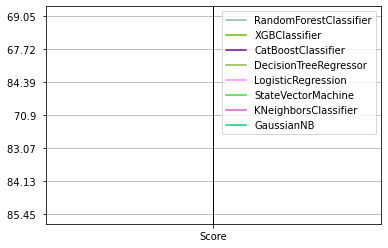

In [37]:
# boxplot = resultsdf.boxplot(column=['Algorithm Name', 'Score'])
pd.plotting.parallel_coordinates(resultsdf, 'Algorithm Name' )

In [38]:
# pd.plotting.radviz(resultsdf, 'Score')
resultsdf

,Algorithm Name,Score
0,RandomForestClassifier,85.45
1,XGBClassifier,84.13
2,CatBoostClassifier,84.13
3,DecisionTreeRegressor,83.07
4,LogisticRegression,70.9
5,StateVectorMachine,84.39
6,KNeighborsClassifier,67.72
7,GaussianNB,69.05


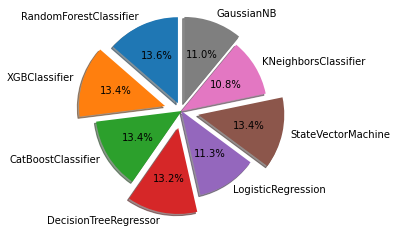

In [39]:
# pd.plotting.scatter_matrix(resultsdf, alpha=0.2)

import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = resultsdf['Algorithm Name']
sizes = resultsdf['Score']
explode = (.1, .2, 0,.2,0,.2,0,.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [40]:
resultsdf.dtypes


Algorithm Name    object
Score             object
dtype: object

In [41]:
# resultsdf['Score'].to_numeric()

resultsdf["Score"] = pd.to_numeric(resultsdf["Score"])

In [42]:
resultsdf.set_index('Score')

,Algorithm Name
Score,
85.45,RandomForestClassifier
84.13,XGBClassifier
84.13,CatBoostClassifier
83.07,DecisionTreeRegressor
70.90,LogisticRegression
84.39,StateVectorMachine
67.72,KNeighborsClassifier
69.05,GaussianNB


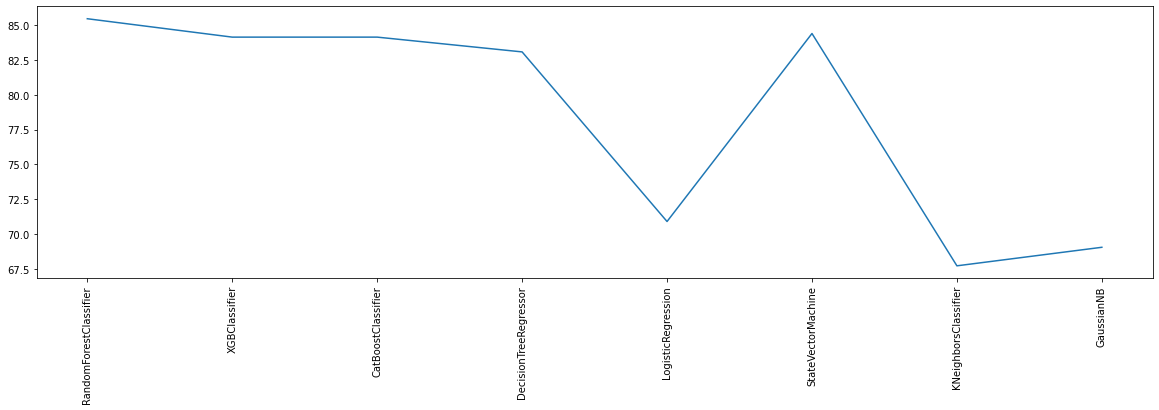

In [43]:
x=resultsdf['Algorithm Name']
y=resultsdf['Score']

tickvalues = range(0,len(x)) #// or tickvalues = df.index
plt.figure(figsize = (20,5))
plt.xticks(ticks = tickvalues , rotation = 'vertical')
plt.plot(x,y)

([<matplotlib.axis.XTick at 0x282cb30a5e0>,
 [Text(0, 0, 'RandomForestClassifier'),
  Text(1, 0, 'XGBClassifier'),
  Text(2, 0, 'CatBoostClassifier'),
  Text(3, 0, 'DecisionTreeRegressor'),
  Text(4, 0, 'LogisticRegression'),
  Text(5, 0, 'StateVectorMachine'),
  Text(6, 0, 'KNeighborsClassifier'),
  Text(7, 0, 'GaussianNB')])

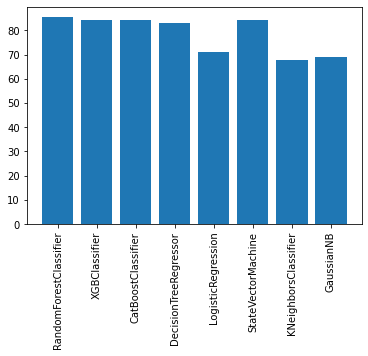

In [44]:
import matplotlib.pyplot as plt
x=resultsdf['Algorithm Name']
y=resultsdf['Score']

y_pos = range(len(x))
plt.bar(y_pos, y)

plt.xticks(y_pos, x, rotation=90)

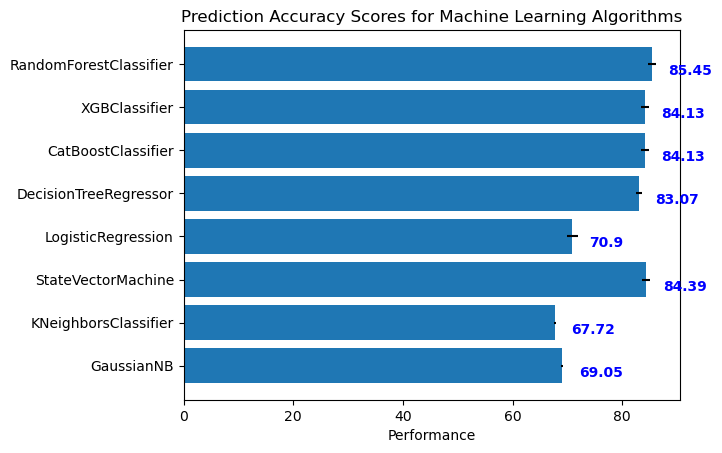

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = resultsdf['Algorithm Name']
y_pos = np.arange(len(people))
performance = resultsdf['Score']
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('Prediction Accuracy Scores for Machine Learning Algorithms')
for i, v in enumerate(y):
    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')
plt.show()

In [46]:
resultsdf

,Algorithm Name,Score
0,RandomForestClassifier,85.45
1,XGBClassifier,84.13
2,CatBoostClassifier,84.13
3,DecisionTreeRegressor,83.07
4,LogisticRegression,70.90
5,StateVectorMachine,84.39
6,KNeighborsClassifier,67.72
7,GaussianNB,69.05
